# Computer Vision Contours

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

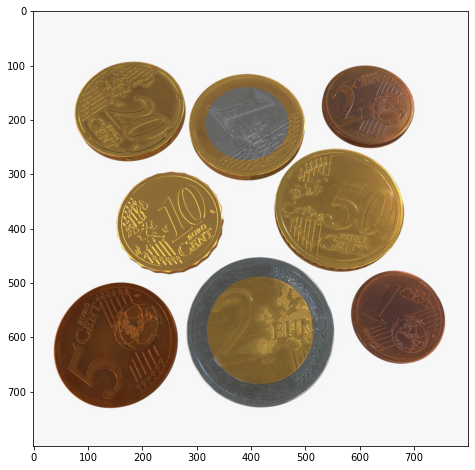

In [23]:
# Have a look at the image below
color_coins = cv2.imread('img/coins4.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

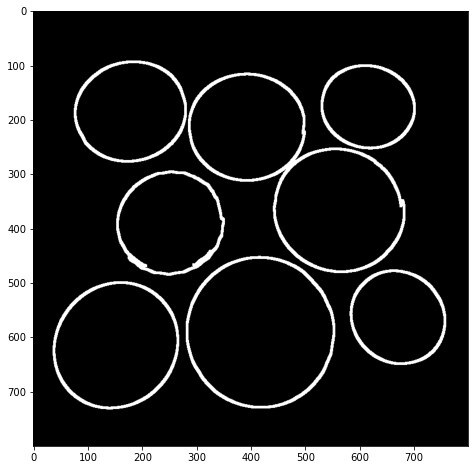

In [24]:
# Convert the image above to grayscale
coins_gray = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)
# Apply some gaussian blur to it (try differente size kernels)
coin_blur = cv2.GaussianBlur(coins_gray, (7,7), 0)
# Apply Canny to find edges and display the image 
coin_edges = cv2.Canny(coin_blur, 100, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
dilation_n  = cv2.dilate(coin_edges, kernel, iterations = 1)
plt.figure(figsize = (12,8))
plt.imshow(dilation_n, cmap = 'gray')


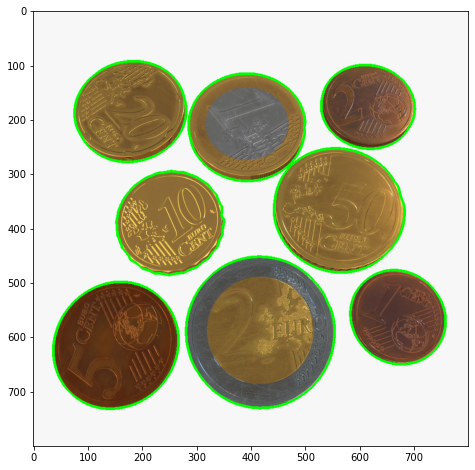

In [25]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

ret, th = cv2.threshold(coin_blur, 225, 255, cv2.THRESH_BINARY_INV)
coin_contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coin_copy = rgb_coins.copy()
cv2.drawContours(coin_copy, coin_contours, -1, (0,255,0), 3)
plt.figure(figsize = (12,8))
plt.imshow(coin_copy)

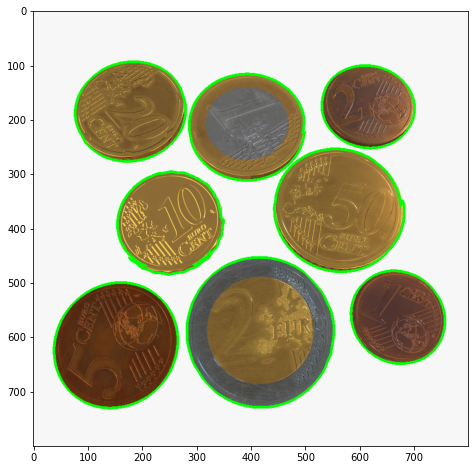

In [26]:
ret, th = cv2.threshold(coin_edges, 254, 255, cv2.THRESH_BINARY)
coin_contours_canny, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
coin_copy = rgb_coins.copy()
cv2.drawContours(coin_copy, coin_contours_canny, -1, (0,255,0), 3)
plt.figure(figsize = (12,8))
plt.imshow(coin_copy)

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [27]:
# print the number of contours that has been found
print("Canny_img: ", len(coin_contours_canny), "Gray_IMG: ", len(coin_contours))

Canny_img:  9 Gray_IMG:  8


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

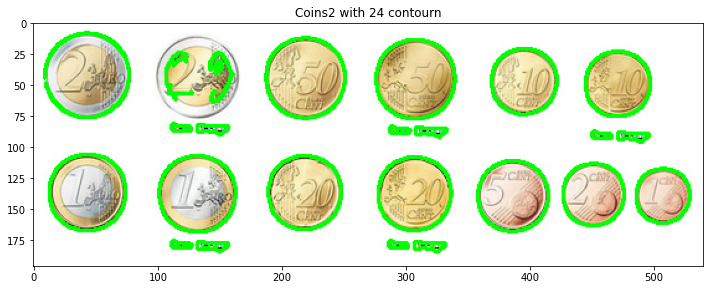

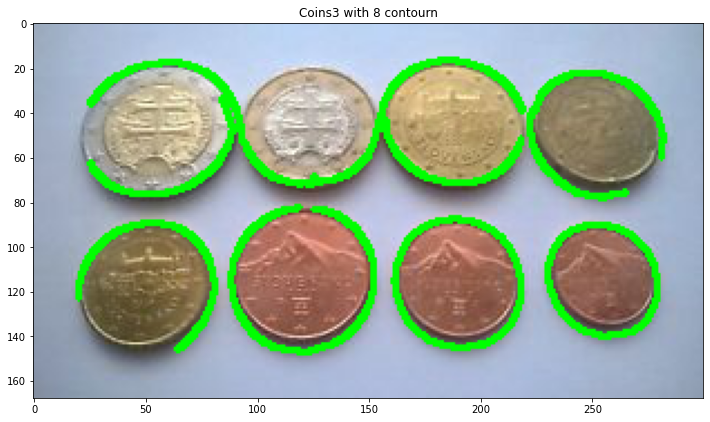

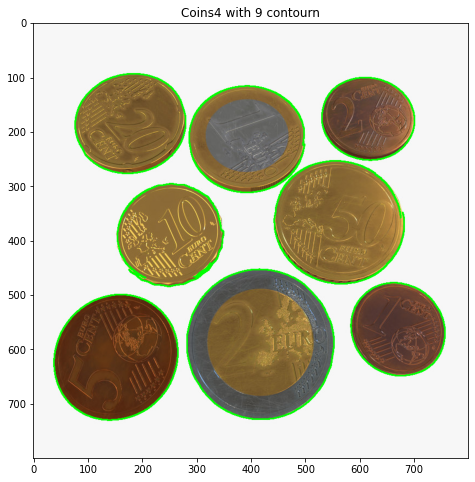

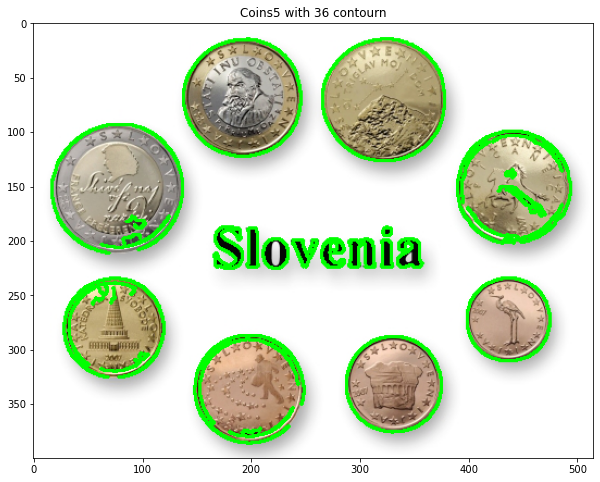

In [28]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
def get_contourn(img, 
                 thresh_val = 100, 
                 apply_canny = False, 
                 canny_start = 50, 
                 apply_gaussBlur = False, 
                 gauss_kernel = (7,7),
                 apply_dilation = False,
                 kernel_dilation = (3,3)
                ):
    var_THRESH = cv2.THRESH_BINARY_INV
    
    if apply_gaussBlur is True: img = cv2.GaussianBlur(img, gauss_kernel, 0)
    
    if apply_canny is True: 
        img = cv2.Canny(img, canny_start, 255)
        var_THRESH = cv2.THRESH_BINARY
    
    if apply_dilation is True:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,kernel_dilation)
        img  = cv2.dilate(img, kernel, iterations = 1)
    
    ret, th = cv2.threshold(img, thresh_val, 255, var_THRESH)    
    img_contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return img_contours


contourns_vec  = []
img_vect = []
for i in range(2,6):
    color_coins = cv2.imread('img/coins{}.jpg'.format(i), cv2.IMREAD_COLOR)
    rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)
    coins_gray = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)
    contourns_vec.append(get_contourn(coins_gray, 
                                      thresh_val = 210, 
                                      apply_canny = True,
                                      canny_start = 100,
                                      apply_gaussBlur = True,
                                      gauss_kernel = (7,7),
                                      apply_dilation = True,
                                      kernel_dilation = (1,1)
                                     ))
    img_vect.append(rgb_coins)


for i,j,x in zip(img_vect, contourns_vec, range(2,6)):    
    cv2.drawContours(i, j, -1, (0,255,0), 2)
    plt.figure(figsize = (12,8))
    plt.title("Coins{} with {} contourn".format(x, len(j)))
    plt.imshow(i)    

## Sorting Contours

### By area

In [29]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [30]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var

vec_areas = get_contour_areas(coin_contours)

In [31]:
# Print the contour areas to screen
print(vec_areas)

[42028.5, 23712.5, 59563.5, 29166.0, 42848.0, 33450.0, 20817.5, 29841.5]


In [32]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_countors = sorted(vec_areas, reverse = True)
print(sorted_countors)

[59563.5, 42848.0, 42028.5, 33450.0, 29841.5, 29166.0, 23712.5, 20817.5]


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [33]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
sorted_countors_inv = sorted(vec_areas, reverse = False)
print(sorted_countors_inv)

[20817.5, 23712.5, 29166.0, 29841.5, 33450.0, 42028.5, 42848.0, 59563.5]


In [34]:
# Filter out only the 5 biggest contours and print them
print(sorted_countors[:5])

[59563.5, 42848.0, 42028.5, 33450.0, 29841.5]


[Hint](# "Just slice the array!") 

In [35]:
# Now in a clean image draw the contours you just filtered out and display it
sorted_count = sorted(coin_contours, key = get_contour_areas, reverse = True)
len(sorted_count)

8

43

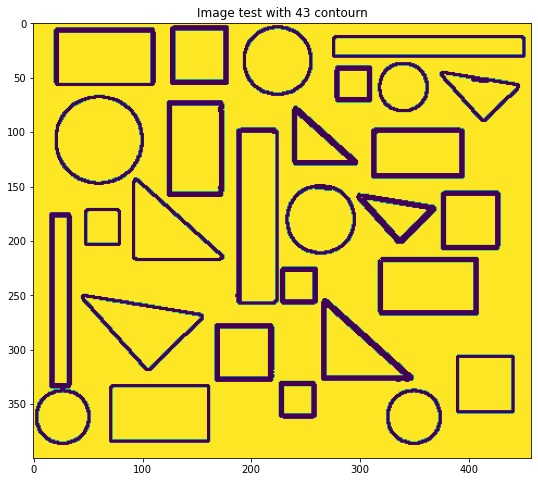

In [36]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!
shape_img = cv2.imread('img/test.jpg'.format(i), cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(shape_img,cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

j = get_contourn(coins_gray,
                 thresh_val = 100, 
                 apply_canny = True,
                 canny_start = 100, 
                 apply_gaussBlur = False,
                 gauss_kernel = (7,7),
                 apply_dilation = False,
                 kernel_dilation = (3,3))

image = np.ones(shape_img.shape[:2]) #EMPTY IMAGE

cv2.drawContours(image, j, -1, (0,255,0), 2)
plt.figure(figsize = (12,8))
plt.title("Image {} with {} contourn".format('test', len(j)))
plt.imshow(image)
sorted_count = sorted(j, key = get_contour_areas, reverse = True)
len(sorted_count)

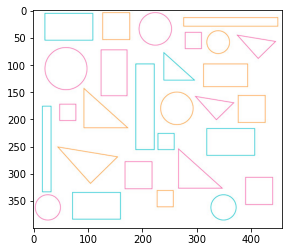

In [37]:
plt.imshow(rgb_img)

### By X coordinate (left to right)

In [38]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [39]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
sorted_countors_by_x = sorted(coin_contours, key = get_contour_x_center_coordinate, reverse = True)
print(len(sorted_countors_by_x))

8


In [ ]:
# Draw the contours one at a time and display the images on screen 
import time
window_name = 'test'
for i in sorted_countors_by_x:
    cv2.drawContours(coin_copy, i, -1, (255,0,0), 2)
    cv2.imshow(window_name, coin_copy)
    time.sleep(1)
    
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
